In [87]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [88]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

287


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
0,5bf0f42a3be03329be9d148689ff94f29ae6eebe,irate-cons,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/original.txt,cq.txt,semi/cot-original.json,...,0.603333,0.703349,0.71,0.818810,0.58,0.670333,0.52,0.620905,1,COT
1,d2c8585fee2c6e986a2e02f1cddc2f647afe5798,eager-toga,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/original.txt,cq.txt,semi/ccot-original.json,...,0.640000,0.748900,0.71,0.821185,0.60,0.698032,0.61,0.727485,1,CCOT
2,cce419f025b20f023080ef7d46cf39a9f713d236,barky-buoy,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,0.626667,0.728144,0.70,0.809113,0.59,0.673722,0.59,0.701596,1,COT
3,344ae1feba339068949157dfbfe5475880fde429,gouty-mate,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,0.636667,0.736496,0.72,0.814165,0.57,0.671056,0.62,0.724267,1,COT
4,bd59c4d52f4609626d0e126ae6053e25cf333ec3,lippy-food,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,...,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,1,CCOT


In [89]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [90]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
0,minus-scab,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.646667,0.745449,0.70,0.806764,0.60,0.694222,0.64,0.735360,1,CCOT
1,lippy-food,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,1,CCOT
2,snide-iglu,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,3,0.656667,0.747483,0.71,0.813859,0.61,0.693722,0.65,0.734867,1,CCOT
3,lowse-tics,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.643333,0.745538,0.70,0.809653,0.61,0.696294,0.62,0.730667,1,CCOT
4,lippy-lame,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.623333,0.729068,0.71,0.815859,0.56,0.673103,0.60,0.698241,1,CCOT


In [91]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,params.run
32,COK,cok/adapted.txt,cq.txt,semi/cok.json,2,1,0.7,"(1, 3)"


In [92]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [93]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'ccot/original', 'cok/adapted',
       'cok/original', 'cot/format-thought', 'cot/original',
       'cte/format-triplets-few', 'direct/format-few'], dtype=object)

In [94]:
df = df[df['params.run']==2]

In [95]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
0,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.1,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303
1,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.5,0.623333,0.729068,0.71,0.815859,0.56,0.673103,0.60,0.698241
2,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.7,0.630000,0.728313,0.73,0.817097,0.59,0.678119,0.57,0.689723
3,CCOT,ccot/format-thought,cq,semi/ccot,1,1,0.1,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413
4,CCOT,ccot/format-thought,cq,semi/ccot,1,1,0.5,0.626667,0.718097,0.67,0.750038,0.64,0.716111,0.57,0.688140


In [96]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
79,CTE,cte/format-triplets-few,cq,semi/cte,2,1,0.7,0.700000,0.796310,0.77,0.852358,0.69,0.762475,0.64,0.774099
93,DIRECT,direct/format-few,cq,semi/direct,3,1,0.5,0.676667,0.781744,0.73,0.843585,0.65,0.744255,0.65,0.757391
34,COK,cok/adapted,cq,semi/cok,3,1,0.7,0.673333,0.779552,0.73,0.827392,0.66,0.753149,0.63,0.758115
56,COT,cot/format-thought,cq,semi/cot,3,1,0.1,0.663333,0.775215,0.73,0.842024,0.63,0.737960,0.63,0.745662
9,CCOT,ccot/format-thought,cq,semi/ccot,3,1,0.1,0.663333,0.770955,0.71,0.821310,0.64,0.739984,0.64,0.751571


## Visualizations

In [97]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [98]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [99]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
1,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.1,2,0.653333,0.754578,ccot/format-thought | cq | 0
4,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.5,2,0.623333,0.729068,ccot/format-thought | cq | 0
7,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.7,2,0.630000,0.728313,ccot/format-thought | cq | 0
10,CCOT,ccot/format-thought,cq,semi/ccot,1,1,0.1,2,0.650000,0.742611,ccot/format-thought | cq | 1
13,CCOT,ccot/format-thought,cq,semi/ccot,1,1,0.5,2,0.626667,0.718097,ccot/format-thought | cq | 1
...,...,...,...,...,...,...,...,...,...,...,...
273,DIRECT,direct/format-few,cq,semi/direct,2,1,0.5,2,0.656667,0.769234,direct/format-few | cq | 2
276,DIRECT,direct/format-few,cq,semi/direct,2,1,0.7,2,0.666667,0.767096,direct/format-few | cq | 2
279,DIRECT,direct/format-few,cq,semi/direct,3,1,0.1,2,0.676667,0.774026,direct/format-few | cq | 3
282,DIRECT,direct/format-few,cq,semi/direct,3,1,0.5,2,0.676667,0.781744,direct/format-few | cq | 3


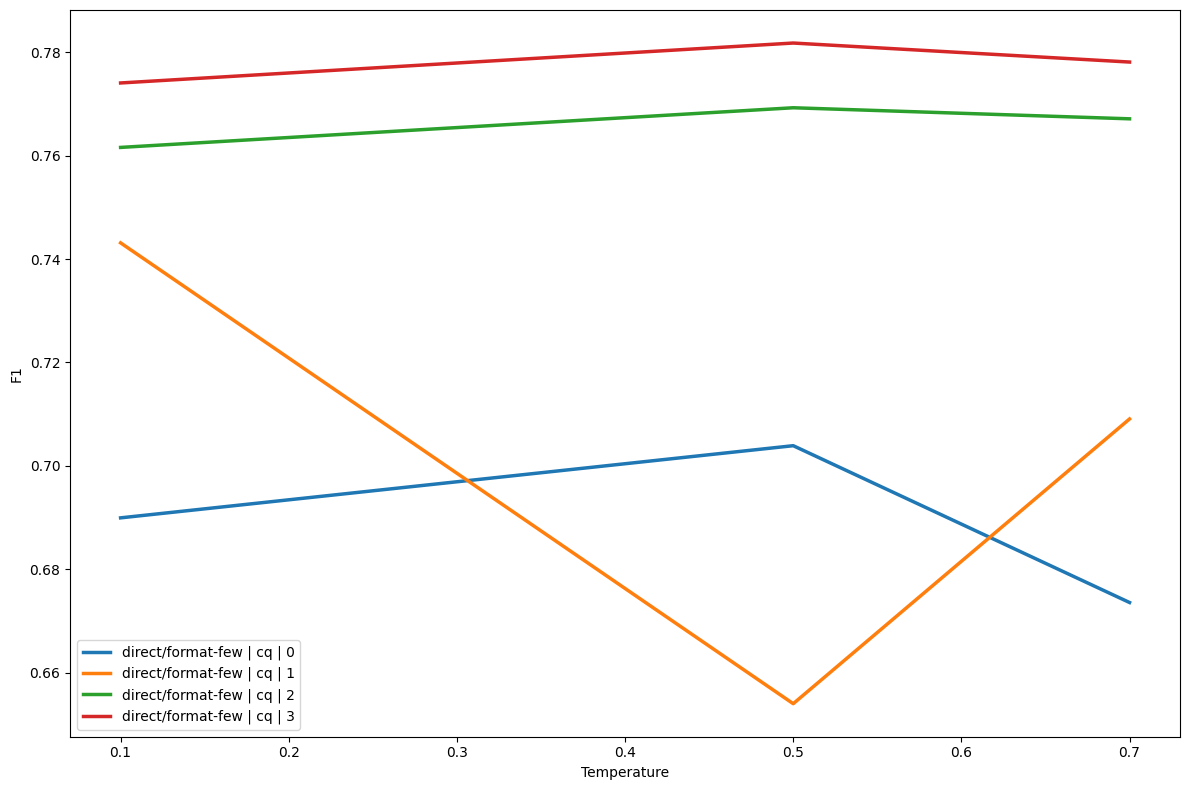

In [100]:
plot_variance(prepared_df, technique='DIRECT', legend='brief')

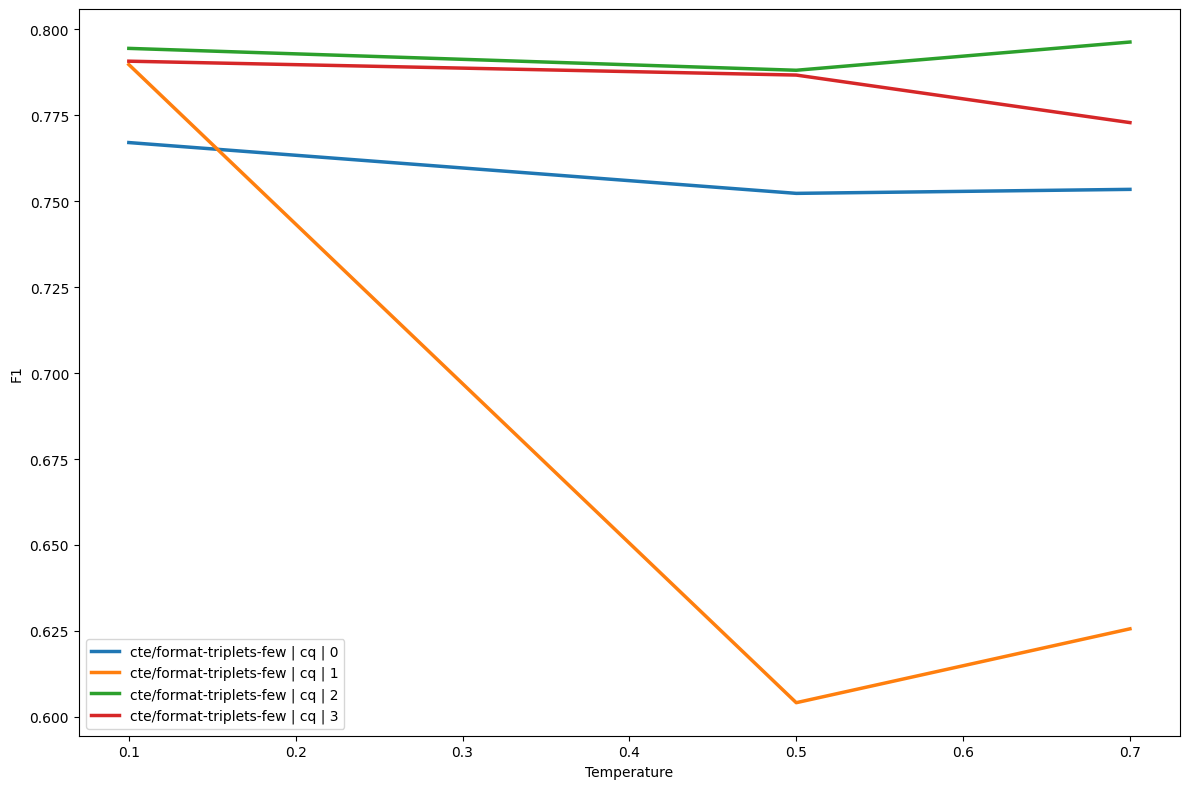

In [101]:
plot_variance(prepared_df, technique='CTE', legend='brief')

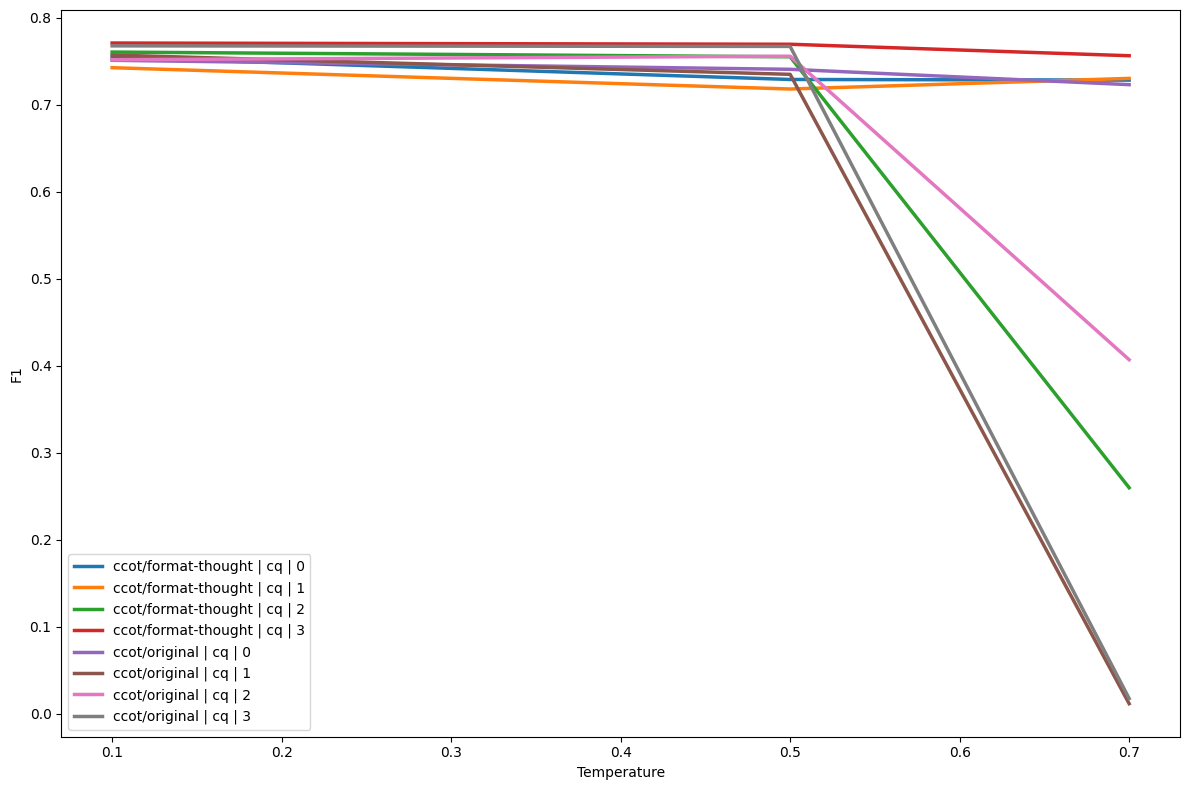

In [102]:
plot_variance(prepared_df, technique='CCOT', legend='brief')

In [103]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
28,CCOT,ccot/format-thought,cq,semi/ccot,3,1,0.1,2,0.663333,0.770955,ccot/format-thought | cq | 3
31,CCOT,ccot/format-thought,cq,semi/ccot,3,1,0.5,2,0.660000,0.769553,ccot/format-thought | cq | 3
34,CCOT,ccot/format-thought,cq,semi/ccot,3,1,0.7,2,0.650000,0.756358,ccot/format-thought | cq | 3
99,COK,cok/adapted,cq,semi/cok,3,1,0.1,2,0.003333,0.003450,cok/adapted | cq | 3
102,COK,cok/adapted,cq,semi/cok,3,1,0.5,2,0.233333,0.277694,cok/adapted | cq | 3
105,COK,cok/adapted,cq,semi/cok,3,1,0.7,2,0.673333,0.779552,cok/adapted | cq | 3
171,COT,cot/format-thought,cq,semi/cot,3,1,0.1,2,0.663333,0.775215,cot/format-thought | cq | 3
174,COT,cot/format-thought,cq,semi/cot,3,1,0.5,2,0.656667,0.762241,cot/format-thought | cq | 3
177,COT,cot/format-thought,cq,semi/cot,3,1,0.7,2,0.660000,0.766469,cot/format-thought | cq | 3
234,CTE,cte/format-triplets-few,cq,semi/cte,2,1,0.1,2,0.716667,0.794464,cte/format-triplets-few | cq | 2


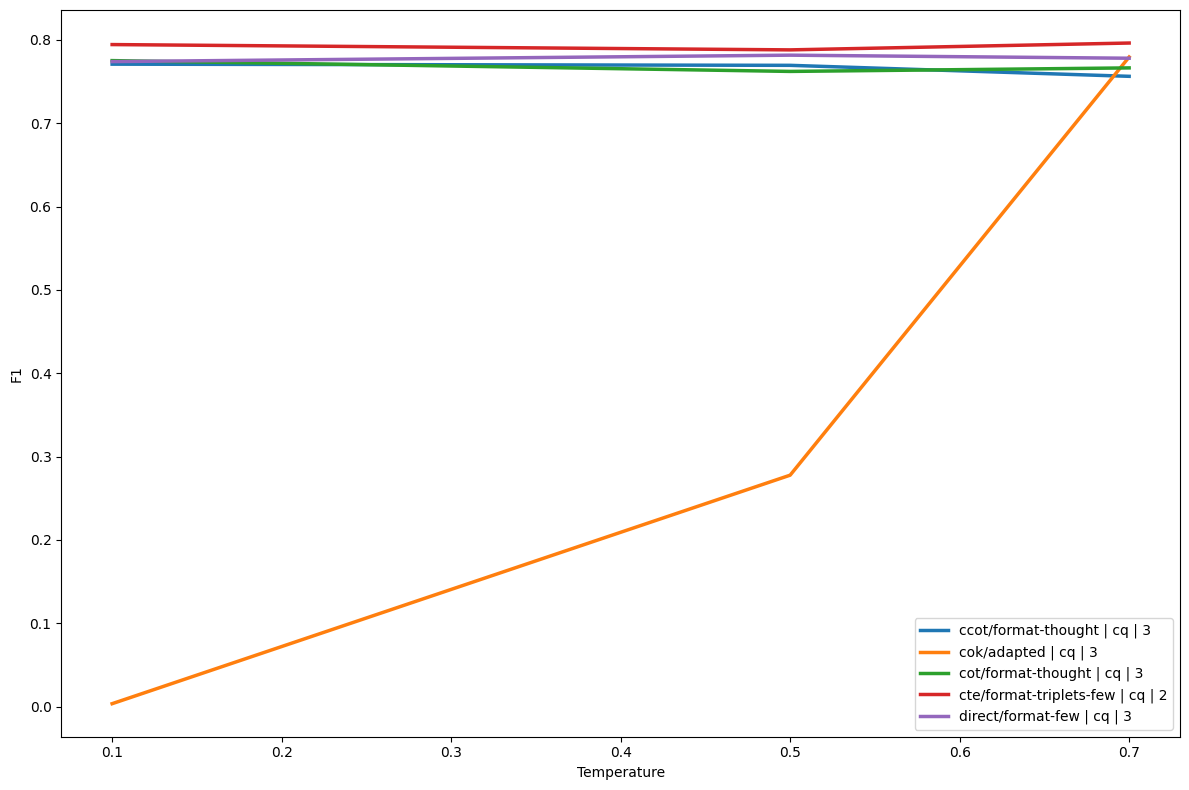

In [104]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

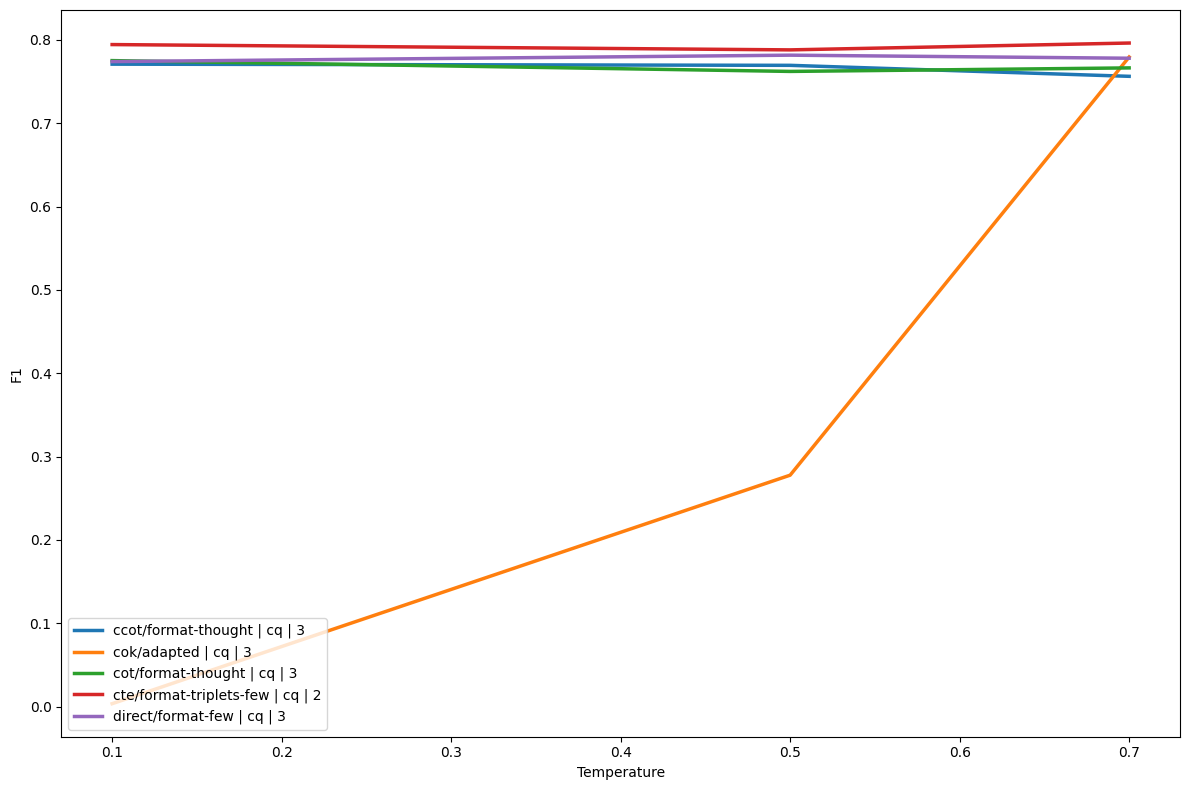

In [105]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

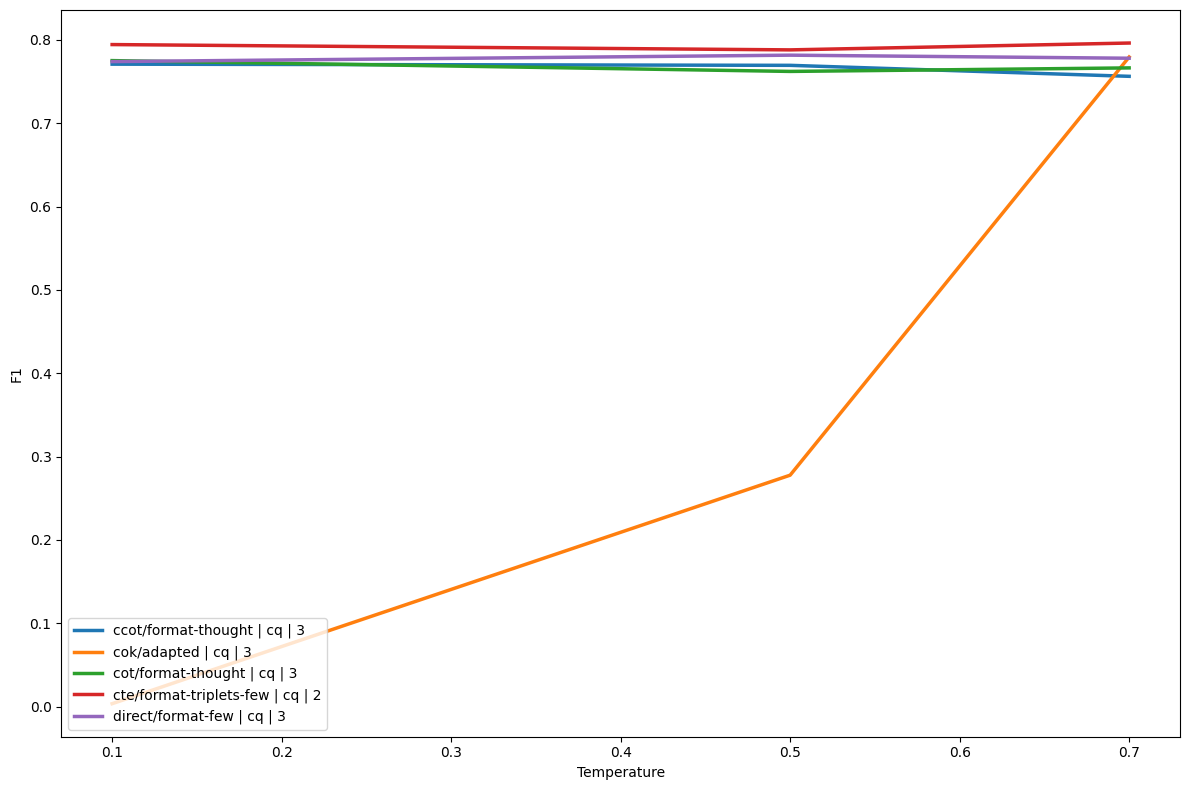

In [106]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

/tmp/ipykernel_776071/1818533546.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


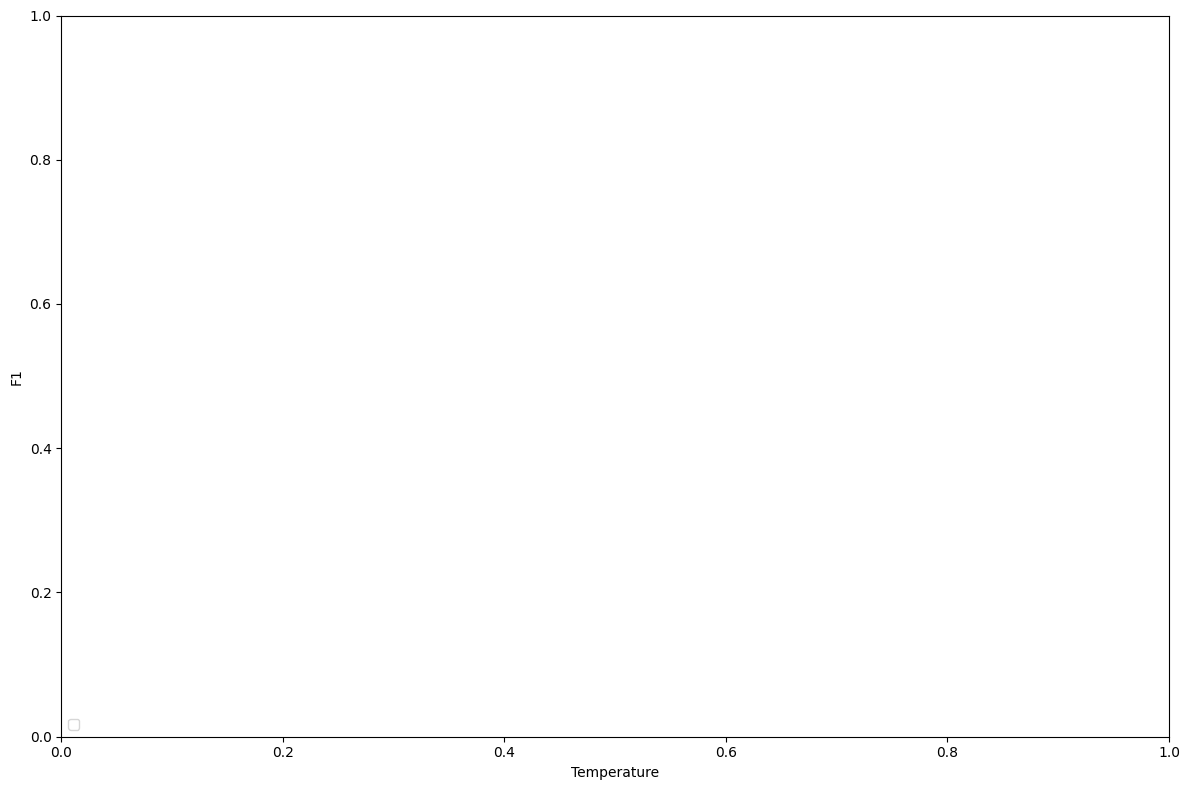

In [107]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CCOT', figsize=(12, 8), legend_loc='lower left')

/tmp/ipykernel_776071/1818533546.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


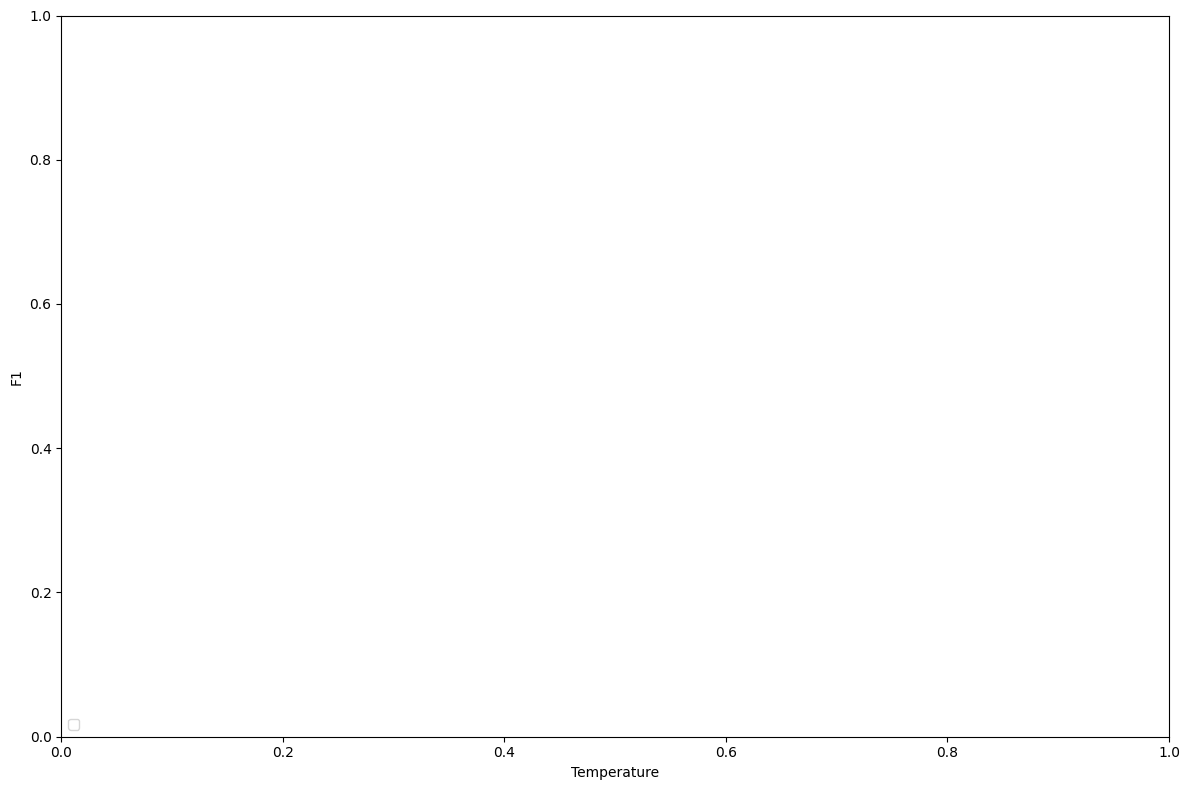

In [108]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CTE', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [109]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

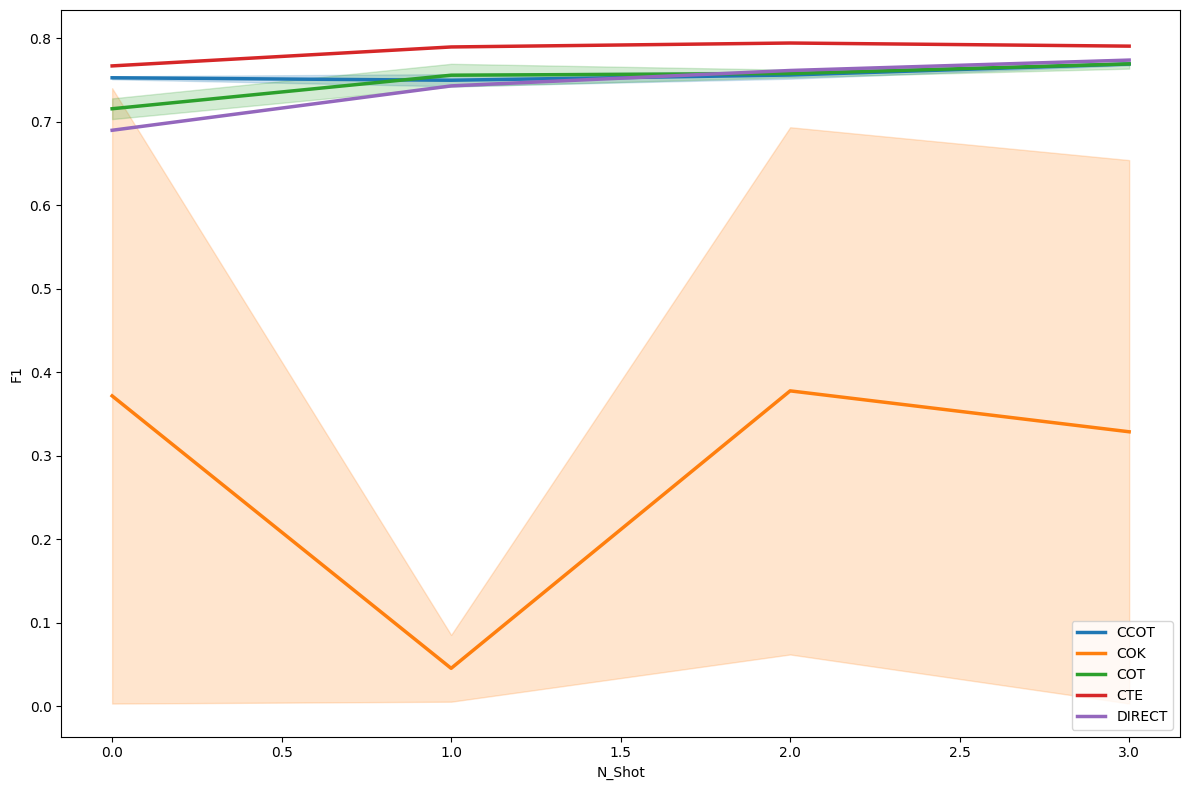

In [110]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

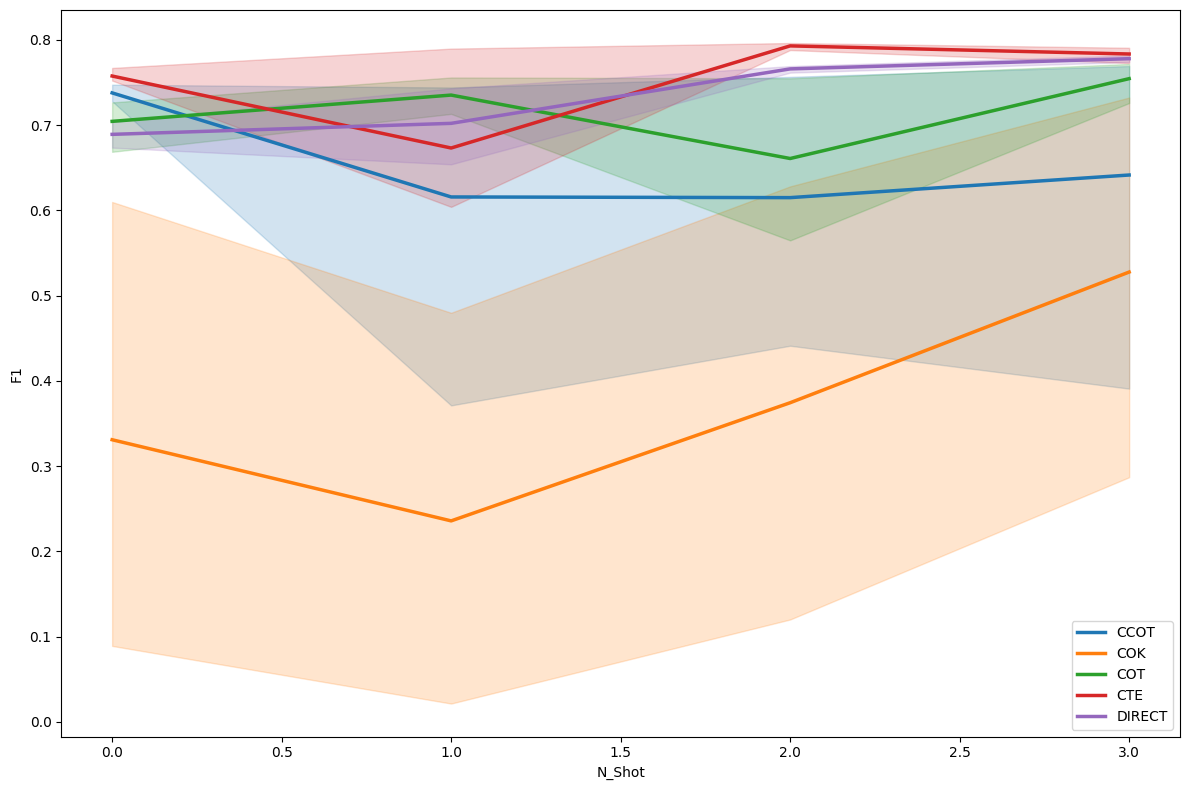

In [111]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [112]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
1,lippy-food,0.1,ccot/format-thought,cq,semi/ccot,0,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,1,CCOT
4,lippy-lame,0.5,ccot/format-thought,cq,semi/ccot,0,2,0.623333,0.729068,0.71,0.815859,0.56,0.673103,0.60,0.698241,1,CCOT
7,veiny-pupa,0.7,ccot/format-thought,cq,semi/ccot,0,2,0.630000,0.728313,0.73,0.817097,0.59,0.678119,0.57,0.689723,1,CCOT
10,macro-sima,0.1,ccot/format-thought,cq,semi/ccot,1,2,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413,1,CCOT
13,glial-inti,0.5,ccot/format-thought,cq,semi/ccot,1,2,0.626667,0.718097,0.67,0.750038,0.64,0.716111,0.57,0.688140,1,CCOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,sedgy-rite,0.5,direct/format-few,cq,semi/direct,2,2,0.656667,0.769234,0.71,0.834452,0.63,0.731127,0.63,0.742123,1,DIRECT
276,hexed-fare,0.7,direct/format-few,cq,semi/direct,2,2,0.666667,0.767096,0.73,0.834056,0.63,0.728571,0.64,0.738662,1,DIRECT
279,cross-coof,0.1,direct/format-few,cq,semi/direct,3,2,0.676667,0.774026,0.73,0.827643,0.66,0.742278,0.64,0.752156,1,DIRECT
282,metal-flit,0.5,direct/format-few,cq,semi/direct,3,2,0.676667,0.781744,0.73,0.843585,0.65,0.744255,0.65,0.757391,1,DIRECT


In [113]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
234,leafy-waft,0.1,cte/format-triplets-few,cq,semi/cte,2,2,0.716667,0.794464,0.80,0.863306,0.70,0.755846,0.65,0.764242,1,CTE
243,rathe-soft,0.1,cte/format-triplets-few,cq,semi/cte,3,2,0.696667,0.790737,0.75,0.840782,0.70,0.770006,0.64,0.761424,1,CTE
225,azure-arks,0.1,cte/format-triplets-few,cq,semi/cte,1,2,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984,1,CTE
171,freed-fils,0.1,cot/format-thought,cq,semi/cot,3,2,0.663333,0.775215,0.73,0.842024,0.63,0.737960,0.63,0.745662,1,COT
279,cross-coof,0.1,direct/format-few,cq,semi/direct,3,2,0.676667,0.774026,0.73,0.827643,0.66,0.742278,0.64,0.752156,1,DIRECT
28,funny-chow,0.1,ccot/format-thought,cq,semi/ccot,3,2,0.663333,0.770955,0.71,0.821310,0.64,0.739984,0.64,0.751571,1,CCOT
153,telic-tors,0.1,cot/format-thought,cq,semi/cot,1,2,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548,1,COT
64,dosed-bite,0.1,ccot/original,cq,semi/ccot-original,3,2,0.663333,0.767704,0.70,0.808731,0.65,0.743952,0.64,0.750429,1,CCOT
216,murky-iota,0.1,cte/format-triplets-few,cq,semi/cte,0,2,0.683333,0.767067,0.76,0.850539,0.66,0.717222,0.63,0.733438,1,CTE
207,gluey-crag,0.1,cot/original,cq,semi/cot-original,3,2,0.656667,0.763795,0.73,0.834929,0.62,0.730460,0.62,0.725996,1,COT
